In [ ]:

!git clone https://github.com/wesalmagdi/Ultrasound-Based-Classification-of-Uterine-Abnormalities.git


fatal: destination path 'Ultrasound-Based-Classification-of-Uterine-Abnormalities' already exists and is not an empty directory.


In [ ]:
%cd Ultrasound-Based-Classification-of-Uterine-Abnormalities


/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities/Ultrasound-Based-Classification-of-Uterine-Abnormalities


In [ ]:
import pandas as pd
import numpy as np


data = pd.read_csv("/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/Dataset.csv")

# separate features and labels
X = data.drop(columns=['label']).values
y = data['label'].values                 # 0 or 1

print("Feature shape:", X.shape)
print("Label shape:", y.shape)

Feature shape: (128, 401)
Label shape: (128,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (102, 401)
Test shape: (26, 401)


In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(38, activation='relu', input_shape=(407,)),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                │ (None, 38)             │        15,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 38)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,543 (60.71 KB)

 Trainable params: 15,543 (60.71 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Corrected input_shape
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=8,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4879 - loss: 1.0564 - val_accuracy: 0.6190 - val_loss: 0.6606
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6555 - loss: 0.5201 - val_accuracy: 0.7619 - val_loss: 0.5308
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7570 - loss: 0.4789 - val_accuracy: 0.7143 - val_loss: 0.5218
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8015 - loss: 0.3980 - val_accuracy: 0.6190 - val_loss: 0.5236
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8683 - loss: 0.3112 - val_accuracy: 0.8095 - val_loss: 0.5049
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9169 - loss: 0.2750 - val_accuracy: 0.8095 - val_loss: 0.4710
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9091 - loss: 0.2674 - val_accuracy: 0.7619 - val_loss: 0.4667
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9395 - loss: 0.2655 - val_accuracy: 0.7143 - val_l

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8846 - loss: 0.3305
Test Accuracy: 0.8846153616905212
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[13  1]
 [ 2 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.91      0.83      0.87        12

    accuracy                           0.88        26
   macro avg       0.89      0.88      0.88        26
weighted avg       0.89      0.88      0.88        26



In [ ]:
import os
import glob

# 1. Define the root directory of the cloned repository
root_dir = '/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities'

# List of common image file extensions
image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tif', '.tiff')

image_files = []

# 2. Walk through the defined directory and its subdirectories to find all image files
for dirpath, dirnames, filenames in os.walk(root_dir):
    for filename in filenames:
        if filename.lower().endswith(image_extensions):
            image_files.append(os.path.join(dirpath, filename))

# 3. Print the total number of image files found
print(f"Total number of image files found: {len(image_files)}")

# 4. If image files are found, print the paths of the first 5 image files
if image_files:
    print("\nFirst 5 image file paths (if available):")
    for i in range(min(5, len(image_files))):
        print(image_files[i])
else:
    print("No image files found.")


Total number of image files found: 299

First 5 image file paths (if available):
/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/image.png
/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/predicted_masks/0122_pred_mask.png
/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/predicted_masks/0097_pred_mask.png
/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/predicted_masks/0054_pred_mask.png
/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/predicted_masks/0056_pred_mask.png


In [ ]:
import re
import pandas as pd
import os

dataset_path = '/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/Dataset.csv'
dataset_df = pd.read_csv(dataset_path)
dataset_ids = dataset_df['id'].unique()

image_ids = set()
for img_path in image_files:
    match = re.search(r'\\/(\\d{{3,4}})_', img_path)
    if match:
        image_id = int(match.group(1))
        image_ids.add(image_id)


print(f"Number of unique IDs in Dataset.csv: {len(dataset_ids)}")
print(f"First 10 IDs from Dataset.csv: {dataset_ids[:10].tolist()}\n")

print(f"Number of unique IDs extracted from image filenames: {len(image_ids)}")
print(f"First 10 IDs from image filenames (if available): {sorted(list(image_ids))[:10]}")


common_ids = set(dataset_ids) & image_ids
print(f"\nNumber of common IDs between Dataset.csv and image filenames: {len(common_ids)}")

if common_ids:
    print("There's an overlap in IDs, suggesting a direct link. Further investigation into naming conventions and image types (original vs. masks) is needed.")
else:
    print("No direct overlap in IDs found. The linking might be implicit or use a different naming convention.")


print("\nSample image paths with extracted IDs for verification:")
for img_path in image_files[:5]: # Take the first 5 for inspection
    match = re.search(r'\\/(\\d{{3,4}})_', img_path)
    if match:
        print(f"Path: {img_path}, Extracted ID: {match.group(1)}")
    else:
        print(f"Path: {img_path}, No ID found with current regex")


Number of unique IDs in Dataset.csv: 128
First 10 IDs from Dataset.csv: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Number of unique IDs extracted from image filenames: 0
First 10 IDs from image filenames (if available): []

Number of common IDs between Dataset.csv and image filenames: 0
No direct overlap in IDs found. The linking might be implicit or use a different naming convention.

Sample image paths with extracted IDs for verification:
Path: /content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/image.png, No ID found with current regex
Path: /content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/predicted_masks/0122_pred_mask.png, No ID found with current regex
Path: /content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/predicted_masks/0097_pred_mask.png, No ID found with current regex
Path: /content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/predicted_masks/0054_pred_mask.png, No ID found with current regex
Path: /content/Ultr

In [ ]:
import os


original_images_dir = '/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/images'
predicted_masks_dir = '/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/predicted_masks'


image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tif', '.tiff')


original_image_files = []
mask_files = []


for dirpath, dirnames, filenames in os.walk(original_images_dir):
    for filename in filenames:
        if filename.lower().endswith(image_extensions):
            original_image_files.append(os.path.join(dirpath, filename))


for dirpath, dirnames, filenames in os.walk(predicted_masks_dir):
    for filename in filenames:
        if filename.lower().endswith(image_extensions):
            mask_files.append(os.path.join(dirpath, filename))


print(f"Total number of original image files found: {len(original_image_files)}")
print(f"Total number of predicted mask files found: {len(mask_files)}")


if original_image_files:
    print("\nFirst 5 original image file paths:")
    for i in range(min(5, len(original_image_files))):
        print(original_image_files[i])
else:
    print("No original image files found.")

if mask_files:
    print("\nFirst 5 predicted mask file paths:")
    for i in range(min(5, len(mask_files))):
        print(mask_files[i])
else:
    print("No predicted mask files found.")

Total number of original image files found: 128
Total number of predicted mask files found: 128

First 5 original image file paths:
/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/images/0080.jpg
/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/images/0013.jpg
/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/images/0090.jpg
/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/images/0119.jpg
/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/images/0124.jpg

First 5 predicted mask file paths:
/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/predicted_masks/0122_pred_mask.png
/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/predicted_masks/0097_pred_mask.png
/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/predicted_masks/0054_pred_mask.png
/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/predicte

In [ ]:
import numpy as np


dataset_ids_set = set(dataset_ids)


common_original_image_ids = dataset_ids_set.intersection(original_image_ids)
print(f"\nNumber of common IDs between Dataset.csv and original image filenames: {len(common_original_image_ids)}")
if len(common_original_image_ids) == len(dataset_ids_set):
    print("Perfect match: All IDs in Dataset.csv have a corresponding original image.")
else:
    print("Mismatch: Not all IDs in Dataset.csv have a corresponding original image or vice versa.")


common_mask_ids = dataset_ids_set.intersection(mask_ids)
print(f"\nNumber of common IDs between Dataset.csv and mask filenames: {len(common_mask_ids)}")
if len(common_mask_ids) == len(dataset_ids_set):
    print("Perfect match: All IDs in Dataset.csv have a corresponding mask.")
else:
    print("Mismatch: Not all IDs in Dataset.csv have a corresponding mask or vice versa.")


missing_original_image_ids = dataset_ids_set - original_image_ids
if missing_original_image_ids:
    print(f"\nIDs in Dataset.csv but missing from original images: {sorted(list(missing_original_image_ids))}")
else:
    print("\nNo IDs are missing from original images (all dataset IDs have original images).")

missing_mask_ids = dataset_ids_set - mask_ids
if missing_mask_ids:
    print(f"\nIDs in Dataset.csv but missing from masks: {sorted(list(missing_mask_ids))}")
else:
    print("\nNo IDs are missing from masks (all dataset IDs have masks).")


Number of common IDs between Dataset.csv and original image filenames: 128
Perfect match: All IDs in Dataset.csv have a corresponding original image.

Number of common IDs between Dataset.csv and mask filenames: 128
Perfect match: All IDs in Dataset.csv have a corresponding mask.

No IDs are missing from original images (all dataset IDs have original images).

No IDs are missing from masks (all dataset IDs have masks).


In [ ]:
import cv2
import numpy as np
from tqdm.notebook import tqdm
import os


TARGET_SIZE = (128, 128)


preprocessed_original_images = []
preprocessed_masks = []

image_map = {}
mask_map = {}


for img_path in original_image_files:
    basename = os.path.basename(img_path)
    match = re.search(r'^(\d{3,4})', basename)
    if match:
        image_id = int(match.group(1))
        image_map[image_id] = img_path


for mask_path in mask_files:
    basename = os.path.basename(mask_path)
    match = re.search(r'^(\d{3,4})_', basename)
    if match:
        image_id = int(match.group(1))
        mask_map[image_id] = mask_path


print(f"Preprocessing {len(dataset_ids_set)} images and masks...")
for img_id in tqdm(sorted(list(dataset_ids_set)), desc="Processing Images and Masks"):
    # ensure both original image and mask exist for this ID
    if img_id in image_map and img_id in mask_map:
        original_img_path = image_map[img_id]
        mask_img_path = mask_map[img_id]


        original_image = cv2.imread(original_img_path)
        if original_image is None:
            print(f"Warning: Could not load original image {original_img_path}")
            continue
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        mask_image = cv2.imread(mask_img_path, cv2.IMREAD_GRAYSCALE)
        if mask_image is None:
            print(f"Warning: Could not load mask image {mask_img_path}")
            continue


        original_image_resized = cv2.resize(original_image, TARGET_SIZE)
        mask_image_resized = cv2.resize(mask_image, TARGET_SIZE)


        original_image_normalized = original_image_resized.astype('float32') / 255.0



        mask_image_normalized = mask_image_resized.astype('float32') / 255.0

        preprocessed_original_images.append(original_image_normalized)
        preprocessed_masks.append(mask_image_normalized)
    else:
        print(f"Warning: Missing image or mask for ID {img_id}")


X_images = np.array(preprocessed_original_images)
X_masks = np.array(preprocessed_masks)


if len(X_masks.shape) == 3:
    X_masks = np.expand_dims(X_masks, axis=-1)

print(f"\nShape of preprocessed original images (X_images): {X_images.shape}")
print(f"Shape of preprocessed masks (X_masks): {X_masks.shape}")

Preprocessing 128 images and masks...


Processing Images and Masks:   0%|          | 0/128 [00:00<?, ?it/s]


Shape of preprocessed original images (X_images): (128, 128, 128, 3)
Shape of preprocessed masks (X_masks): (128, 128, 128, 1)


In [ ]:
import pandas as pd
import numpy as np


dataset_full_df = pd.read_csv('/content/Ultrasound-Based-Classification-of-Uterine-Abnormalities/data/Dataset.csv')

# filter dataset_full_df to include only the rows whose 'id' values are present in dataset_ids_set
dataset_aligned_df = dataset_full_df[dataset_full_df['id'].isin(dataset_ids_set)].copy()

# sort dataset_aligned_df by the 'id' column
dataset_aligned_df = dataset_aligned_df.sort_values(by='id').reset_index(drop=True)

# separate the tabular features and the target variable
# create X_tabular by dropping the 'id' column and the 'label' column from dataset_aligned_df
X_tabular = dataset_aligned_df.drop(columns=['id', 'label']).values

y_multimodal = dataset_aligned_df['label'].values


print(f"Shape of preprocessed original images (X_images): {X_images.shape}")
print(f"Shape of preprocessed masks (X_masks): {X_masks.shape}")
print(f"Shape of tabular features (X_tabular): {X_tabular.shape}")
print(f"Shape of multimodal target (y_multimodal): {y_multimodal.shape}")

Shape of preprocessed original images (X_images): (128, 128, 128, 3)
Shape of preprocessed masks (X_masks): (128, 128, 128, 1)
Shape of tabular features (X_tabular): (128, 400)
Shape of multimodal target (y_multimodal): (128,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

tabular_input = Input(shape=(X_tabular.shape[1],), name='tabular_input')
image_input = Input(shape=X_images.shape[1:], name='image_input')
mask_input = Input(shape=X_masks.shape[1:], name='mask_input')


image_branch = Conv2D(32, (3, 3), activation='relu')(image_input)
image_branch = MaxPooling2D((2, 2))(image_branch)
image_branch = Conv2D(64, (3, 3), activation='relu')(image_branch)
image_branch = MaxPooling2D((2, 2))(image_branch)
image_branch = Flatten()(image_branch)


mask_branch = Conv2D(32, (3, 3), activation='relu')(mask_input)
mask_branch = MaxPooling2D((2, 2))(mask_branch)
mask_branch = Conv2D(64, (3, 3), activation='relu')(mask_branch)
mask_branch = MaxPooling2D((2, 2))(mask_branch)
mask_branch = Flatten()(mask_branch)


tabular_branch = Dense(128, activation='relu')(tabular_input)
tabular_branch = Dense(64, activation='relu')(tabular_branch)


combined = concatenate([image_branch, mask_branch, tabular_branch])


classification_head = Dense(64, activation='relu')(combined)
output = Dense(1, activation='sigmoid', name='output')(classification_head)

multimodal_model = Model(inputs=[image_input, mask_input, tabular_input], outputs=output)


multimodal_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


multimodal_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mask_input          │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 126, 126,  │        320 │ mask_input[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 63, 63,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tabular_input       │ (None, 400)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 30, 30,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 30, 30,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     51,328 │ tabular_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 57600)     │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 57600)     │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 115264)    │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │  7,376,960 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         65 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 7,474,817 (28.51 MB)

 Trainable params: 7,474,817 (28.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


X_images_train, X_images_test, \
X_masks_train, X_masks_test, \
X_tabular_train, X_tabular_test, \
y_multimodal_train, y_multimodal_test = train_test_split(
    X_images, X_masks, X_tabular, y_multimodal,
    test_size=0.2,
    random_state=42,
    stratify=y_multimodal
)

print(f"X_images_train shape: {X_images_train.shape}")
print(f"X_masks_train shape: {X_masks_train.shape}")
print(f"X_tabular_train shape: {X_tabular_train.shape}")
print(f"y_multimodal_train shape: {y_multimodal_train.shape}")
print(f"X_images_test shape: {X_images_test.shape}")
print(f"X_masks_test shape: {X_masks_test.shape}")
print(f"X_tabular_test shape: {X_tabular_test.shape}")
print(f"y_multimodal_test shape: {y_multimodal_test.shape}")


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


history_multimodal = multimodal_model.fit(
    {'image_input': X_images_train, 'mask_input': X_masks_train, 'tabular_input': X_tabular_train},
    y_multimodal_train,
    epochs=30,
    batch_size=8,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


print("\nHistory keys:", history_multimodal.history.keys())

X_images_train shape: (102, 128, 128, 3)
X_masks_train shape: (102, 128, 128, 1)
X_tabular_train shape: (102, 400)
y_multimodal_train shape: (102,)
X_images_test shape: (26, 128, 128, 3)
X_masks_test shape: (26, 128, 128, 1)
X_tabular_test shape: (26, 400)
y_multimodal_test shape: (26,)
Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.5118 - loss: 893618.6250 - val_accuracy: 0.6190 - val_loss: 58435.8320
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - accuracy: 0.5562 - loss: 79888.6484 - val_accuracy: 0.6190 - val_loss: 55061.8984
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.5178 - loss: 46973.4883 - val_accuracy: 0.3810 - val_loss: 59192.9570
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - accuracy: 0.5257 - loss: 25483.0059 - val_accuracy: 0.6190 - val_loss: 15327.2949
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - accuracy: 0.4579 - loss: 18546.9199 - val_accuracy: 0.3810 - val_loss: 51428.1367
Epoch 6/30
11/11 ━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.6923 - loss: 1.2141

Test Loss: 1.2141
Test Accuracy: 0.6923
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step

Confusion Matrix:
 [[12  2]
 [ 6  6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.86      0.75        14
           1       0.75      0.50      0.60        12

    accuracy                           0.69        26
   macro avg       0.71      0.68      0.68        26
weighted avg       0.71      0.69      0.68        26



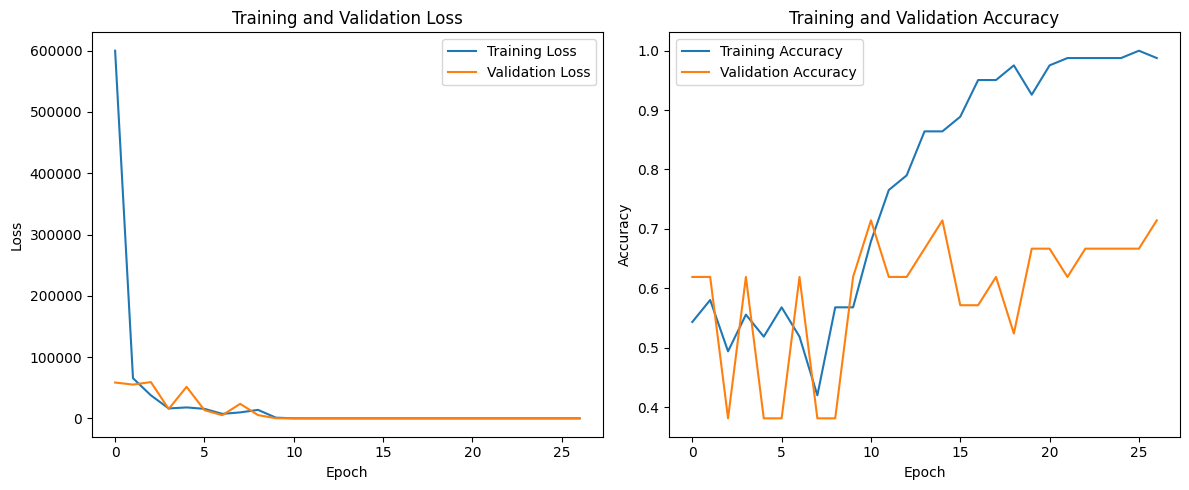

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


test_loss_multimodal, test_accuracy_multimodal = multimodal_model.evaluate(
    {'image_input': X_images_test, 'mask_input': X_masks_test, 'tabular_input': X_tabular_test},
    y_multimodal_test,
    verbose=1
)
print(f"\nTest Loss: {test_loss_multimodal:.4f}")
print(f"Test Accuracy: {test_accuracy_multimodal:.4f}")


y_pred_prob_multimodal = multimodal_model.predict(
    {'image_input': X_images_test, 'mask_input': X_masks_test, 'tabular_input': X_tabular_test}
)
y_pred_multimodal = (y_pred_prob_multimodal >= 0.5).astype(int)


print("\nConfusion Matrix:\n", confusion_matrix(y_multimodal_test, y_pred_multimodal))


print("\nClassification Report:\n", classification_report(y_multimodal_test, y_pred_multimodal))


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history_multimodal.history['loss'], label='Training Loss')
plt.plot(history_multimodal.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_multimodal.history['accuracy'], label='Training Accuracy')
plt.plot(history_multimodal.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# to prevent overlapping titles and labels
plt.tight_layout()

plt.show()